In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------- #
# 1. IRIS FLOWER CLASSIFICATION
# ----------------------------- #

# Load iris dataset
iris_df = pd.read_csv("iris (2).csv")
X_iris = iris_df.drop("species", axis=1)
y_iris = iris_df["species"]

# Train-test split (80/20)
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.2, random_state=42
)

# RBF Kernel SVM
print("\n--- IRIS Dataset ---")
rbf_model = SVC(kernel="rbf")
rbf_model.fit(X_train_iris, y_train_iris)
rbf_preds = rbf_model.predict(X_test_iris)
print("RBF Accuracy:", accuracy_score(y_test_iris, rbf_preds))
print("Confusion Matrix (RBF):\n", confusion_matrix(y_test_iris, rbf_preds))

# Linear Kernel SVM
linear_model = SVC(kernel="linear")
linear_model.fit(X_train_iris, y_train_iris)
linear_preds = linear_model.predict(X_test_iris)
print("Linear Accuracy:", accuracy_score(y_test_iris, linear_preds))
print("Confusion Matrix (Linear):\n", confusion_matrix(y_test_iris, linear_preds))




--- IRIS Dataset ---
RBF Accuracy: 1.0
Confusion Matrix (RBF):
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Linear Accuracy: 1.0
Confusion Matrix (Linear):
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Accuracy Score: 0.9305
Confusion Matrix:
 [[144   0   1   0   0   0   1   0   0   0   1   0   1   0   0   0   0   0
    0   0   1   0   0   0   0   0]
 [  0 143   0   5   0   1   0   0   0   0   0   0   0   0   0   0   0   4
    0   0   0   0   0   0   0   0]
 [  0   0 123   0   2   0   3   1   0   0   1   0   0   0   4   0   0   2
    0   0   1   0   0   0   0   0]
 [  0   1   0 153   0   0   0   2   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   3   1   0 130   0   5   0   0   0   0   0   0   0   0   0   1   0
    0   0   0   0   0   0   0   1]
 [  0   2   0   0   1 134   0   0   1   0   0   0   0   0   0   0   0   0
    1   1   0   0   0   0   0   0]
 [  1   0   1   4   0   0 149   0   0   0   2   0   0   0   0   0   0   2
    0   0   0   1   0   0   0   0]
 [  0   4   0   8   0   0   0 106   0   0   5   0   0   1   2   1   1  13
    0   0   2   0   0   0   1   0]
 [  0   0   0   1   0   2   0   0 134   7   0   0   0   0   0   0   0   0
    0   0   

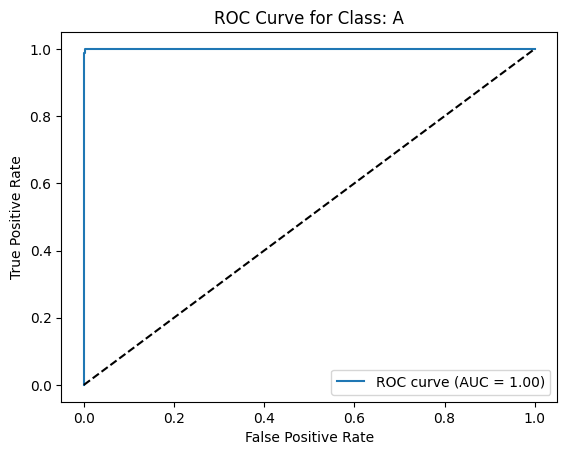

In [7]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Load the letter-recognition dataset
letters = pd.read_csv('letter-recognition.csv')

# Separate features and label
X = letters.iloc[:, 1:]
y = letters.iloc[:, 0]

# Encode the labels for ROC/AUC calculation (one-vs-rest)
lb = LabelBinarizer()
y_bin = lb.fit_transform(y)

# Split data
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.2, random_state=42)
_, _, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM model
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm_model.predict(X_test)
y_score = svm_model.predict_proba(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC Curve and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(lb.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for the first class (just an example)
plt.figure()
plt.plot(fpr[0], tpr[0], label='ROC curve (AUC = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Class: ' + lb.classes_[0])
plt.legend(loc="lower right")
plt.show()
